<a href="https://colab.research.google.com/github/kamangirkhan/Data/blob/main/Project1_201OCT30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Exploratory Data Analysis of Data Science Salaries (2020–2025)**

Viktoriia Lyon,
Arash Nateghian &
Jack Hegarty

Professor Abdirisak Mohamed   
Data 201   
November 6, 2025


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

This Dataset containes the details of the AI, ML, Data Science Salary (2020- 2025).
Salary data is in USD and recalculated at its average fx rate during the year for salaries entered in other currencies.

The data is processed and updated on a weekly basis so the rankings may change over time during the year.

Attribute Information

work_year: The year the salary was paid.
experience_level: The experience level in the job during the year with the following possible values:
EN Entry-level / Junior
MI Mid-level / Intermediate
SE Senior-level / Expert
EX Executive-level / Director
employment_type: The type of employement for the role:
PT Part-time
FT Full-time
CT Contract
FL Freelance
job_title: The role worked in during the year.
salary: The total gross salary amount paid.
salary_currency: The currency of the salary paid as an ISO 4217 currency code.
salary_in_usd: The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.
employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
remote_ratio : The overall amount of work done remotely, possible values are as follows:
0 No remote work (less than 20%)
50 Partially remote/hybird
100 Fully remote (more than 80%)
company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
company_size: The average number of people that worked for the company during the year:
S less than 50 employees (small)
M 50 to 250 employees (medium)
L more than 250 employees (large)
The dataset contains 10,429 rows and provides detailed information that can be analyzed to explore patterns and trends in police shootings across the country. Some questions I am interested in include:


How does salary change by experience level (EN, MI, SE, EX)?

Do remote jobs pay more than in-office jobs?

Which countries pay the highest salaries?

Which job titles have the highest salaries globally?

How has salary changed year-by-year?

In [ ]:
# === Reproducible data fetch (works from GitHub/Colab) ===
# This cell downloads the dataset each time the notebook runs.
# It avoids committing large CSVs or secrets to GitHub.

!pip -q install kagglehub

import kagglehub, os, glob, pandas as pd

DATASET_SLUG = "samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025"

# Download (or reuse cache) and find the CSV
data_dir = kagglehub.dataset_download(DATASET_SLUG)
csv_files = glob.glob(os.path.join(data_dir, "*.csv"))
assert csv_files, f"No CSV files found in: {data_dir}"

csv_path = csv_files[0]
df = pd.read_csv(csv_path)

print("Loaded:", os.path.basename(csv_path), "-> shape:", df.shape)
df.head(2)


Loaded: salaries.csv -> shape: (88584, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M


In [ ]:
df['salary_in_usd'].median()

146307.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


In [ ]:
df.shape

(88584, 11)

In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [ ]:
print(df.duplicated().sum())

44340


This KDE plot shows the distribution of salaries in USD, highlighting the most common salary ranges. The curve is right-skewed, indicating most salaries fall in lower-to-mid ranges while fewer employees earn very high salaries.


This bar chart shows the distribution of experience levels in the dataset. Most employees fall into senior and mid-level roles, with fewer junior and executive-level positions represented.

In [ ]:
# USA subset (company headquarter location)
usa = df[df['company_location'] == 'US'].copy()
usa.shape, usa['salary_in_usd'].describe()[['count','min','50%','mean','max']]


((79762, 11),
 count     79762.000000
 min       16000.000000
 50%      151500.000000
 mean     163539.335949
 max      750000.000000
 Name: salary_in_usd, dtype: float64)

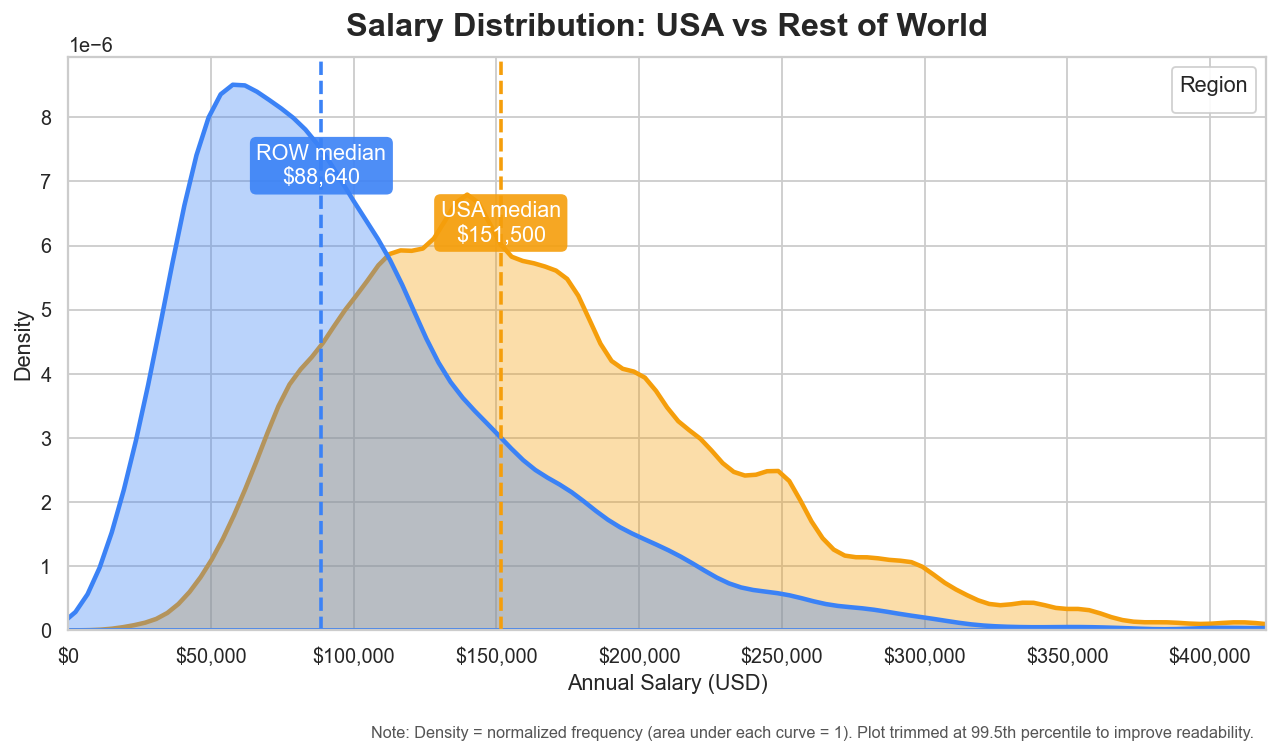

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Data (same split)
df_cmp = df.assign(region=np.where(df['company_location']=='US','USA','Rest of World'))

# Medians
med_row = df_cmp.loc[df_cmp['region']=='Rest of World','salary_in_usd'].median()
med_usa = df_cmp.loc[df_cmp['region']=='USA','salary_in_usd'].median()

# Nice theme + palette
sns.set_theme(style="whitegrid")
palette = {'Rest of World':'#3B82F6',   # blue-500
           'USA':'#F59E0B'}            # amber-500

# Smart x-limit (trim extreme outliers for readability)
xmax = np.percentile(df_cmp['salary_in_usd'], 99.5)
xmin = 0

fig, ax = plt.subplots(figsize=(10,6), dpi=130)

# KDEs
sns.kdeplot(
    data=df_cmp, x='salary_in_usd', hue='region',
    fill=True, common_norm=False, alpha=0.35, linewidth=2.5,
    palette=palette, bw_adjust=0.9, ax=ax
)

# Median lines
ax.axvline(med_row, color=palette['Rest of World'], linestyle='--', linewidth=2)
ax.axvline(med_usa, color=palette['USA'], linestyle='--', linewidth=2)

# Median labels (pretty currency + rounded boxes)
y_hi = ax.get_ylim()[1]
ax.text(med_row, y_hi*0.85, f"ROW median\n${med_row:,.0f}",
        color='white', ha='center', va='top',
        bbox=dict(boxstyle='round,pad=0.3', fc=palette['Rest of World'], ec='none', alpha=0.9))
ax.text(med_usa, y_hi*0.75, f"USA median\n${med_usa:,.0f}",
        color='white', ha='center', va='top',
        bbox=dict(boxstyle='round,pad=0.3', fc=palette['USA'], ec='none', alpha=0.9))

# Axes cosmetics
ax.set_xlim(xmin, xmax)
ax.set_title("Salary Distribution: USA vs Rest of World", fontsize=18, weight='bold', pad=12)
ax.set_xlabel("Annual Salary (USD)", fontsize=12)
ax.set_ylabel("Density", fontsize=12)

# Currency tick formatter
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))

# Legend cleanup
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles, labels, title="Region", frameon=True)
leg.get_frame().set_alpha(0.9)

# Helpful footnote
ax.text(0.99, -0.18,
        "Note: Density = normalized frequency (area under each curve = 1). "
        "Plot trimmed at 99.5th percentile to improve readability.",
        transform=ax.transAxes, ha='right', va='center', fontsize=9, color='#555')

plt.tight_layout()
plt.show()


Here we compare the salary distribution of U.S.-based companies to the rest of the world. The orange curve represents salaries in the U.S., while the blue curve represents all other countries. Even though the data is normalized to USD, it’s not a perfectly fair comparison because cost of living, job titles, and company types differ significantly across regions.

In [ ]:
!pip -q install pycountry plotly


,country,count,iso3
0,US,79762,USA
1,CA,3204,CAN
2,GB,2584,GBR
3,AU,303,AUS
4,DE,272,DEU


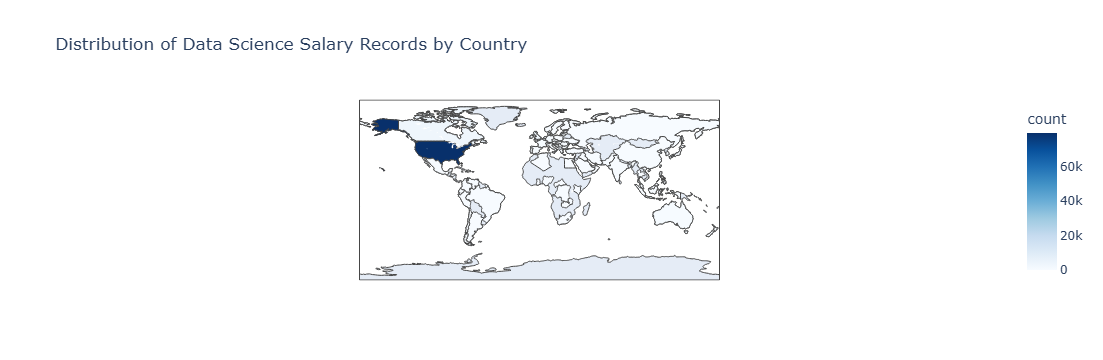

In [ ]:
# === Choropleth: records by company HQ country (robust) ===
import plotly.express as px
import pycountry
import pandas as pd

def to_iso3(alpha2):
    try:
        return pycountry.countries.get(alpha_2=str(alpha2)).alpha_3
    except Exception:
        return None

# Count rows per country (ISO-2 in dataset), make column names consistent
cc = df['company_location'].value_counts().reset_index(name='count')
# After reset_index, the country column might be called 'index' or 'company_location'
if 'company_location' in cc.columns and 'count' in cc.columns and len(cc.columns) == 2:
    cc = cc.rename(columns={'company_location': 'country'})
elif 'index' in cc.columns:
    cc = cc.rename(columns={'index': 'country'})

# Convert ISO-2 -> ISO-3 for Plotly
cc['iso3'] = cc['country'].apply(to_iso3)

# Quick sanity check
display(cc.head())

# Plot (drop rows we couldn't map)
fig = px.choropleth(
    cc.dropna(subset=['iso3']),
    locations='iso3',
    color='count',
    color_continuous_scale='Blues',
    title='Distribution of Data Science Salary Records by Country'
)
fig.show()


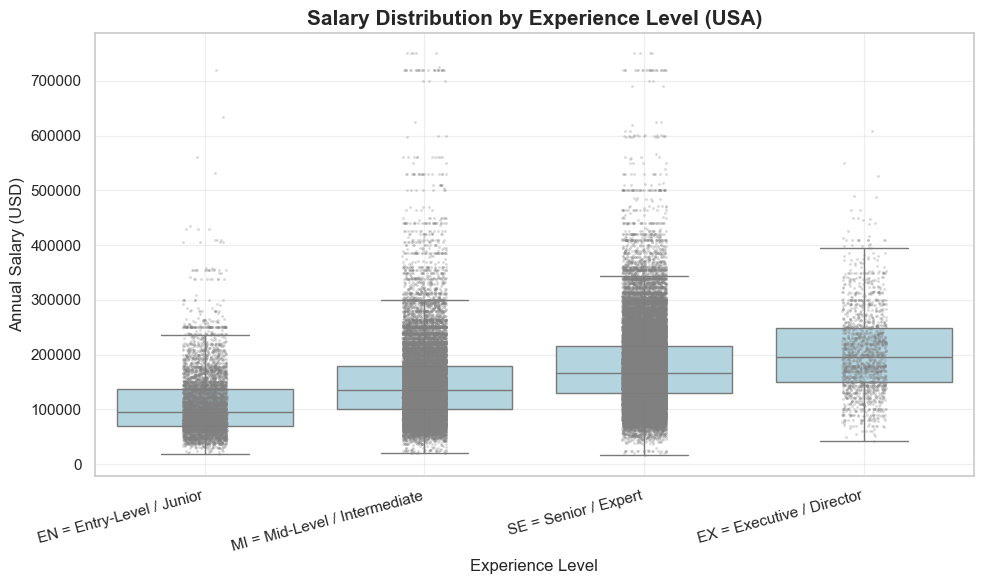

In [ ]:
# Reorder levels and clarify labels
order = ['EN', 'MI', 'SE', 'EX']
labels = [
    'EN = Entry-Level / Junior',
    'MI = Mid-Level / Intermediate',
    'SE = Senior / Expert',
    'EX = Executive / Director'
]

plt.figure(figsize=(10,6))
sns.boxplot(data=usa, x='experience_level', y='salary_in_usd',
            order=order, showfliers=False, color='lightblue')
sns.stripplot(data=usa, x='experience_level', y='salary_in_usd',
              order=order, color='gray', size=2, alpha=0.3)

plt.title('Salary Distribution by Experience Level (USA)', fontsize=15, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Annual Salary (USD)', fontsize=12)
plt.xticks(range(len(order)), labels, rotation=15, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


This boxplot compares salaries for different experience levels in the U.S. dataset. We can see a clear upward trend — as experience increases, so does pay. Entry-level positions (EN) have the lowest median around  85–90K,whilesenior(SE)andexecutive(EX)levelsreachabove 200K. The spread also widens at higher levels, showing that senior and executive roles vary more — some earn double the median depending on company and job title.

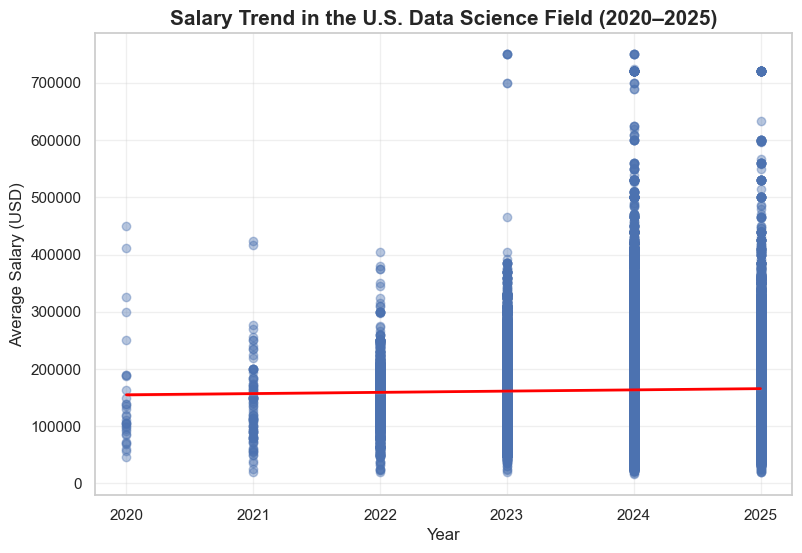

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.regplot(data=usa, x='work_year', y='salary_in_usd', scatter_kws={'alpha':0.4}, line_kws={'color':'red', 'linewidth':2})
plt.title('Salary Trend in the U.S. Data Science Field (2020–2025)', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(alpha=0.3)
plt.show()


95% Confidence Interval: ($X, $Y) — this interval represents the range in which the true median tech salary is likely to fall with 95% confidence.

The lower bound ($X) means there is a 2.5% chance the true median salary is below this value.
The upper bound ($Y) means there is a 2.5% chance the true median salary is above this value.

This range suggests that, based on our bootstrap sample, we can be 95% confident that the true median salary for tech professionals lies within this interval.

In [ ]:
# Bootstrap medians
np.random.seed(123)
boot_medians = []
for i in range(10000):
    sample = usa['salary_in_usd'].sample(frac=1, replace=True)
    boot_medians.append(sample.median())

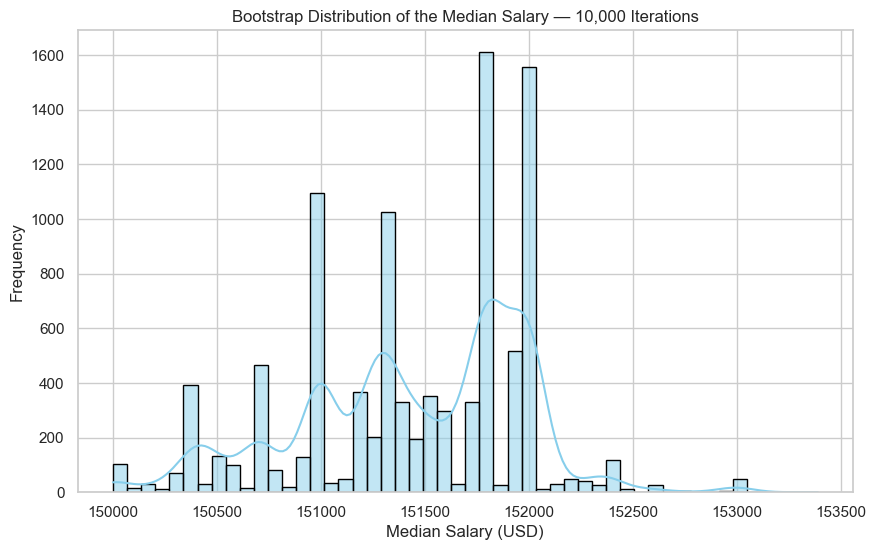

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(boot_medians, bins=50, kde=True, color='skyblue', edgecolor='black')

# Title and labels
plt.title('Bootstrap Distribution of the Median Salary — 10,000 Iterations')
plt.xlabel('Median Salary (USD)')
plt.ylabel('Frequency')

plt.show()

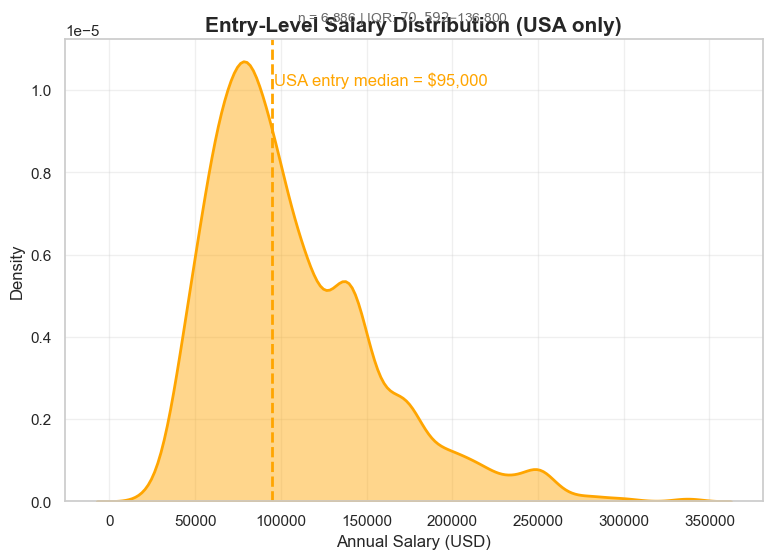

In [ ]:
# Entry-level USA only
entry_usa = df[(df['experience_level'] == 'EN') & (df['company_location'] == 'US')].copy()

# Trim extreme values for readability (keep up to 99.5th percentile just for plotting)
cap = entry_usa['salary_in_usd'].quantile(0.995)
entry_plot = entry_usa[entry_usa['salary_in_usd'] <= cap]

# Summary stats
med = entry_usa['salary_in_usd'].median()
p25 = entry_usa['salary_in_usd'].quantile(0.25)
p75 = entry_usa['salary_in_usd'].quantile(0.75)
n   = len(entry_usa)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
sns.kdeplot(entry_plot['salary_in_usd'], fill=True, alpha=0.45, linewidth=2, color='orange')
plt.axvline(med, color='orange', linestyle='--', linewidth=2)

# Nice label at the median
y_top = plt.ylim()[1]*0.9
plt.text(med+1000, y_top, f'USA entry median = ${med:,.0f}', color='orange', fontsize=12)

plt.title('Entry-Level Salary Distribution (USA only)', fontsize=15, fontweight='bold')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.grid(alpha=0.3)

# Optional subtitle with sample size & IQR
plt.suptitle(f'n = {n:,} | IQR: ${p25:,.0f} – ${p75:,.0f}', y=0.93, fontsize=10, color='dimgray')

plt.show()
